## Eploraroty Data Analysis & Intro
#### Goal
###### 1. Investigate top-paying roles and skills in the data science industry
###### 2. Use Python to explore a real-live dataset on job posting
###### 3.For job-seekers:use these insights to help find the best job opportunities
#### Final Deliverables
###### . Create Jypyther Notebooks (showcasing core skills in Python)
###### . Create a summary page (via README.md) capturing your finding
###### . Share this project via GitHub & LinkedIn


## Importing libraries and dataframe

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
df = pd.read_csv('C:/Users/DELL/Desktop/SQL/Data_analysis/data_jobs.csv')

### Data clean-up

In [49]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x) # This transforms the string into a list  


## Exploitory Data Analysts in the United States

## Getting only data analyst jobs in the USA

In [50]:
# Getting only data analyst jobs in the USA
df_da_usa = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] =='United States')].copy()
# Droping the NaN values from the column for plotting
#df_da_usa = df_da_usa.dropna(subset=['salary_year_avg'])
df_da_usa.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,NaN,NaN,NaN,Assuredpartners,NaN,NaN
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,NaN,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,NaN,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,NaN,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,NaN,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."


In [51]:
df_da_usa['job_location'].value_counts().head(10)
# Converting the about into dataframe


job_location
Anywhere           5106
New York, NY       3035
Atlanta, GA        2741
Chicago, IL        2337
Austin, TX         1919
Dallas, TX         1862
Washington, DC     1592
Charlotte, NC      1433
Tampa, FL          1431
Los Angeles, CA    1328
Name: count, dtype: int64


### Converting df_da_usa['job_location'].value_counts().head(10) into dataframe

In [52]:
df_to_plot = df_da_usa['job_location'].value_counts().head(10).to_frame()

In [22]:
df_to_plot

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


### Ploting using seaborn

### Count of job location for Data Analyst

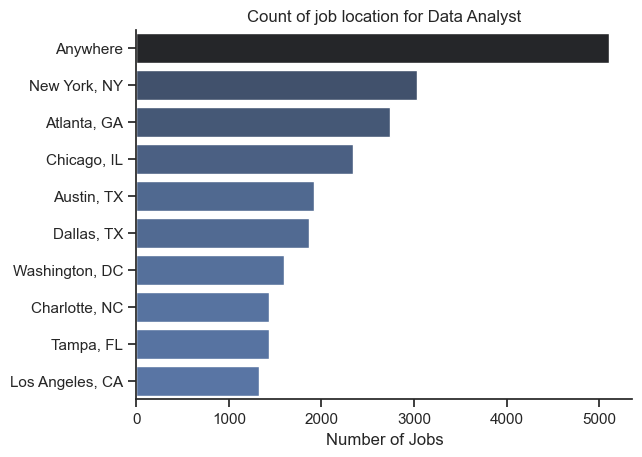

In [53]:
sns.set_theme(style='ticks')
sns.barplot(data=df_to_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine() # This remove the border
plt.title('Count of job location for Data Analyst')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Repartition of Danalyst job based on 
### 'dict_column = {
###  'job_work_from_home': 'Work From Home',
###  'job_no_degree_mention': 'Job Degree Req',
### 'job_health_insurance': 'Health Insurance offered'
### }'

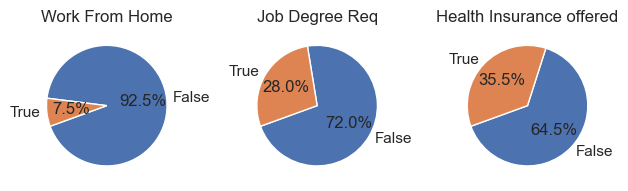

In [59]:
fig, ax = plt.subplots(1,3) # One row and 3 columns
dict_column = {
  'job_work_from_home': 'Work From Home',
  'job_no_degree_mention': 'Job Degree Req',
  'job_health_insurance': 'Health Insurance offered'
}

for i, (column, title) in enumerate(dict_column.items()):
  #print(i, column, title)
  ax[i].pie(df_da_usa[column].value_counts(), labels=df_da_usa[column].value_counts().index,startangle=200, autopct='%1.1f%%')
  ax[i].set_title(title)
plt.tight_layout() # Separates the plots
plt.show()

### Count of company names for Data Analyst in the USA

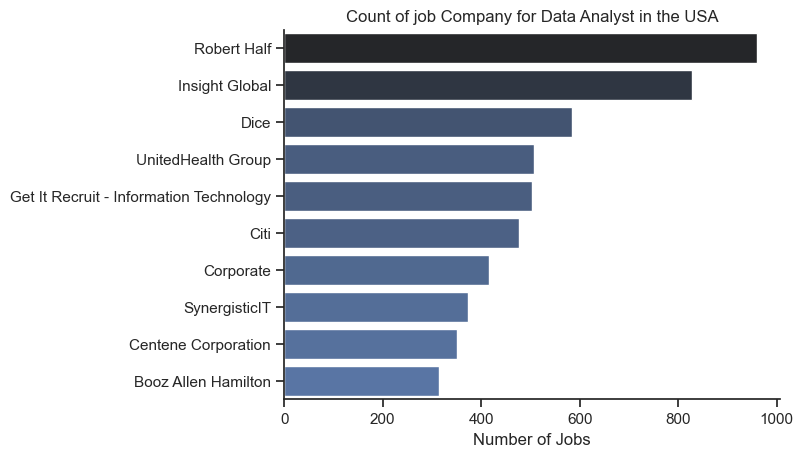

In [63]:
df_to_plot = df_da_usa['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_to_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine() # This remove the border
plt.title('Count of job Company for Data Analyst in the USA')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()